#### 문제 1
날씨 온도 예측, 종속변수 :actual(최고온도)   
데이터 출처 : https://towardsdatascience.com/random-forest-in-python-24d0893d51c0     
데이터 경로 : /kaggle/input/adp-kr-p2/problem1.csv    
temp_1 : 전날 최고온도    
temp_2 : 전전날 최고온도    
friend : 친구의 예측온도

#### 1-1 데이터 확인 및 전처리
- 데이터 EDA 수행     
- 결측치를 확인하고 처리 방안에 대해 논의하라  
- 데이터 분할 방법 설명     
- 최종 데이터셋이 적절함을 주장하라 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # data visualization

import matplotlib.pyplot as plt
%matplotlib inline 

temp = pd.read_csv('../input/adp-kr-p2/problem1.csv')
temp.head()

year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41

In [2]:
temp.shape
# (348, 12)

(348, 12)

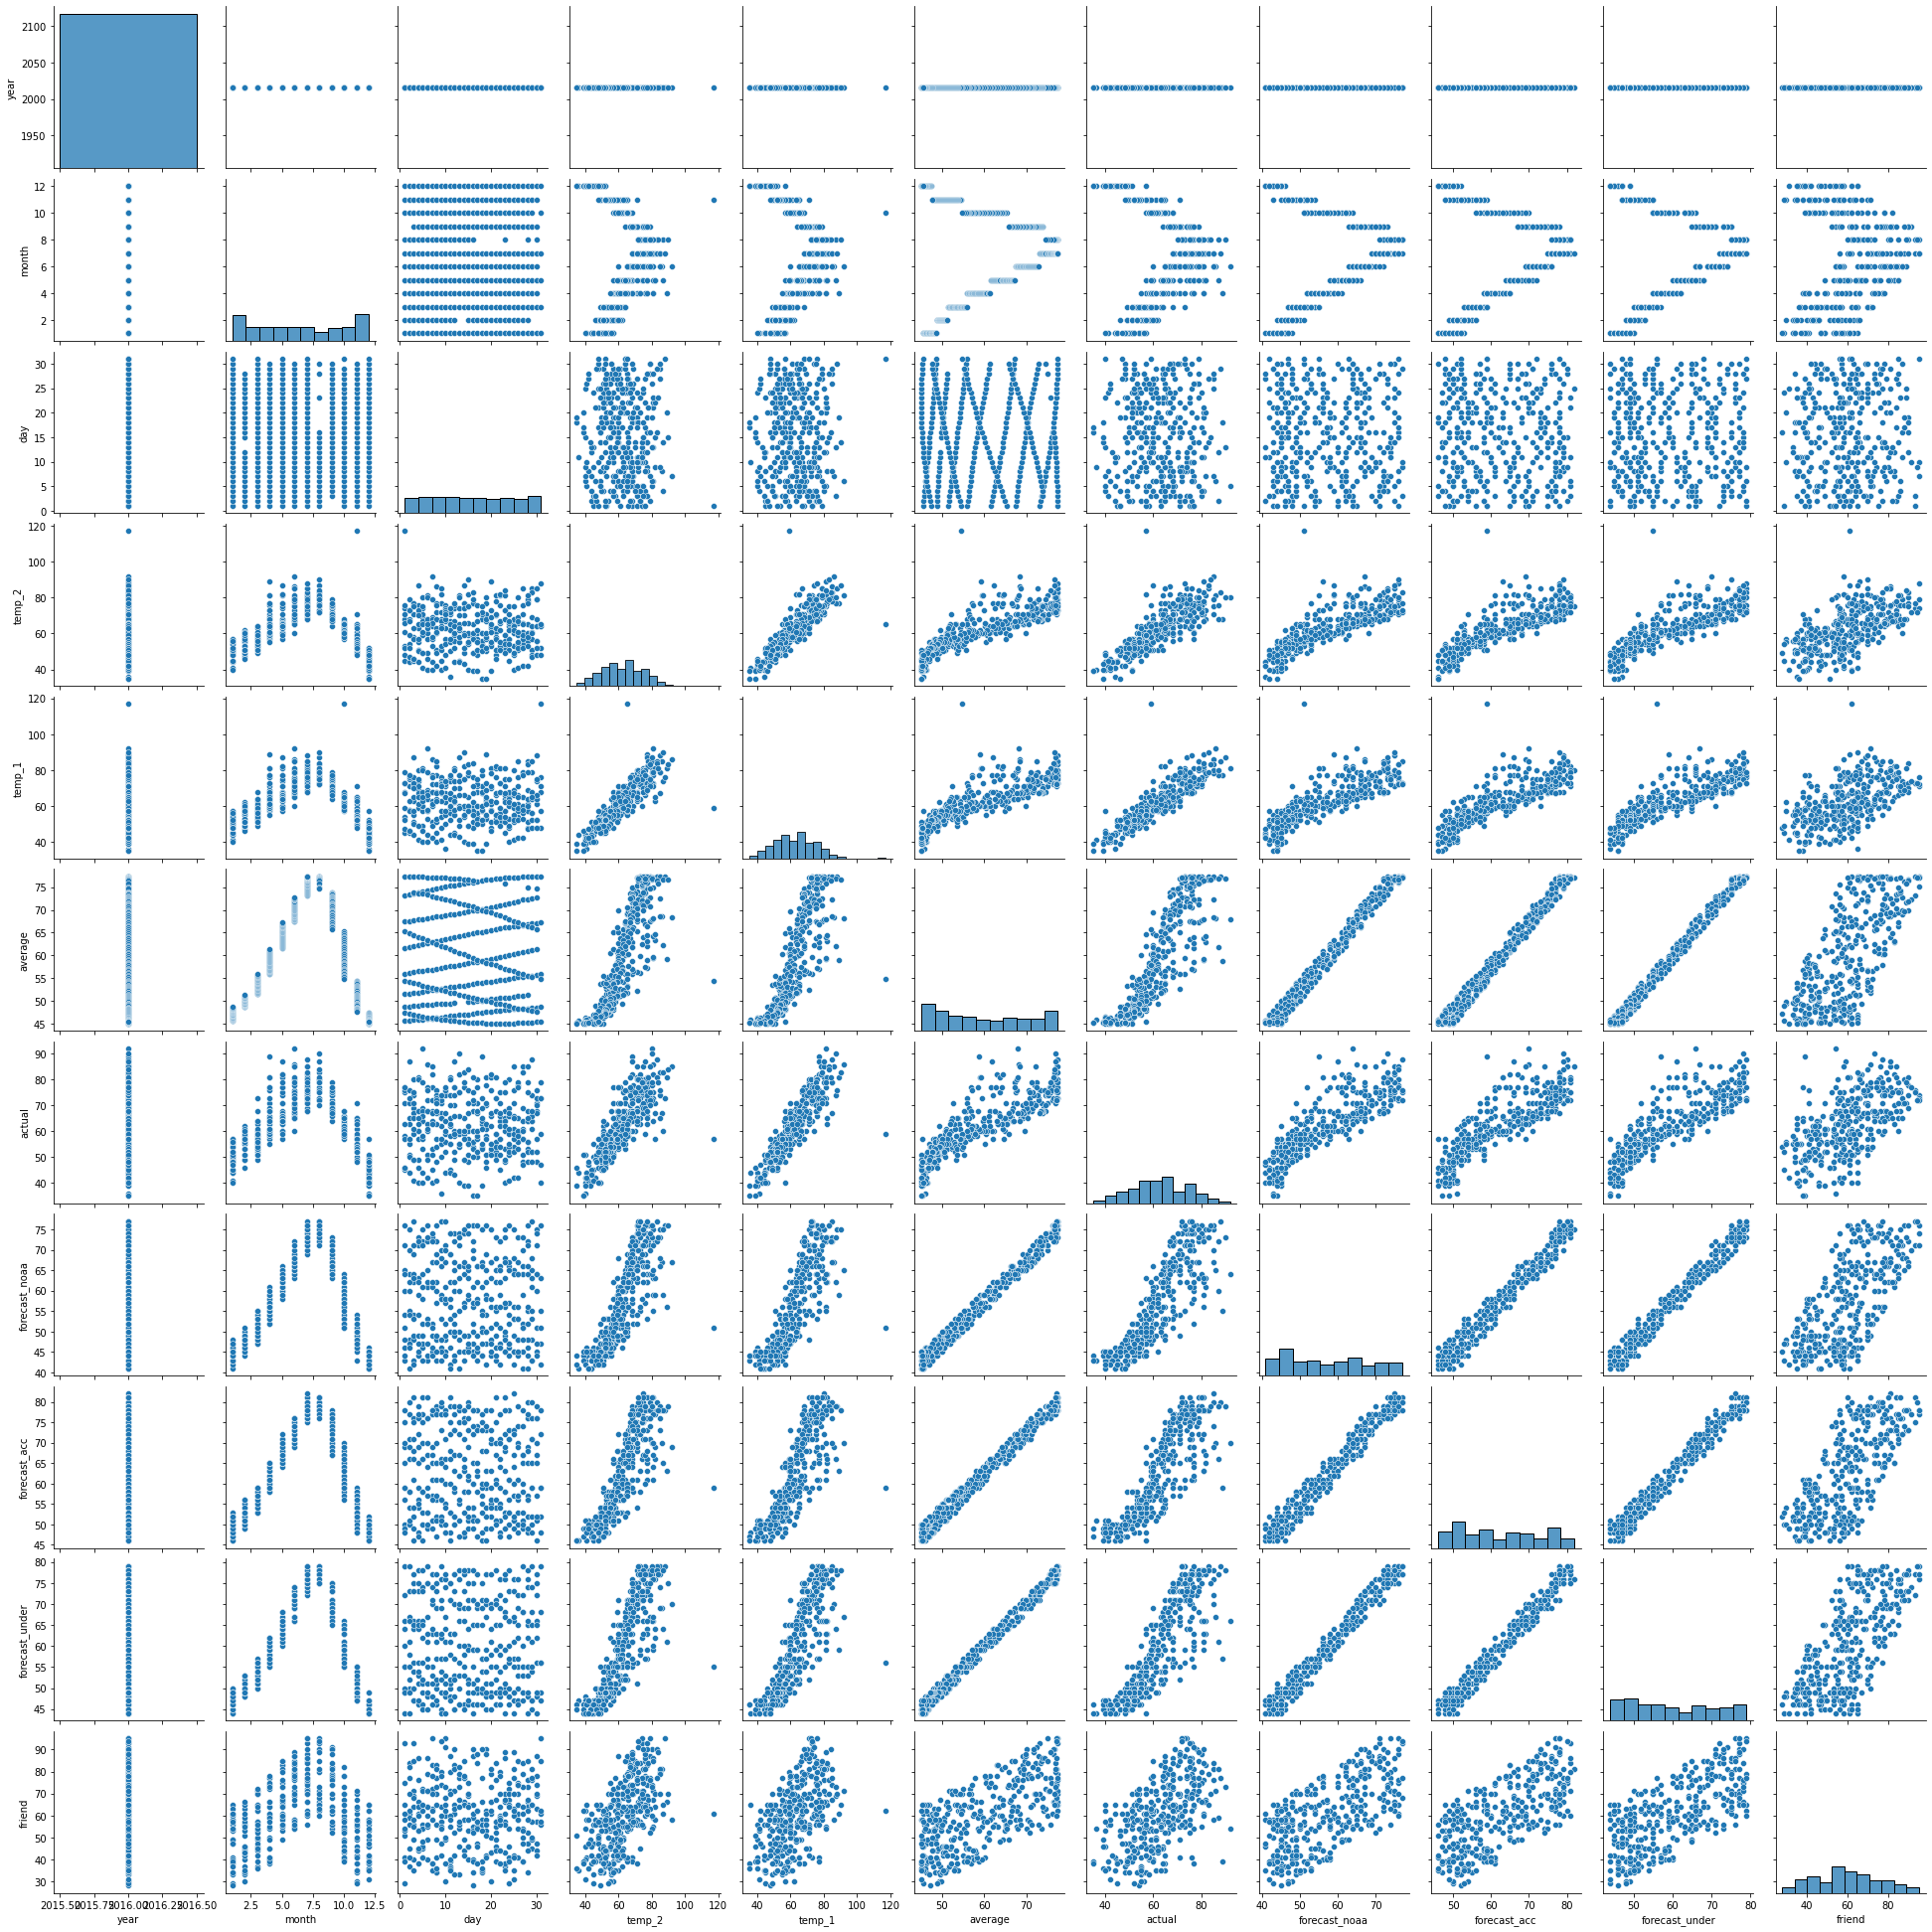

In [3]:
sns.pairplot(temp)
plt.show()

In [4]:
# follow it at emergency

dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_core',
 '_decorators',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'factorplot',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'matrix',

In [5]:
dir(sns.boxplot)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__wrapped__']

In [6]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7f13a012acb0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    variab

<AxesSubplot:xlabel='week', ylabel='temp_1'>

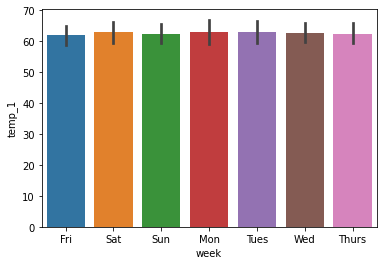

In [7]:
sns.barplot(x="week", y="temp_1", data=temp)

In [8]:
help(sns.regression)

Help on module seaborn.regression in seaborn:

NAME
    seaborn.regression - Plotting functions for linear models (broadly construed).

FUNCTIONS
    lmplot(*, x=None, y=None, data=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None, size=None)
        Plot data and regression model fits across a FacetGrid.
        
        This function combines :func:`regplot` and :class:`FacetGrid`. It is
        intended as a convenient interface to fit regression models across
        conditional subsets of a dataset.
        
        When thinking abou

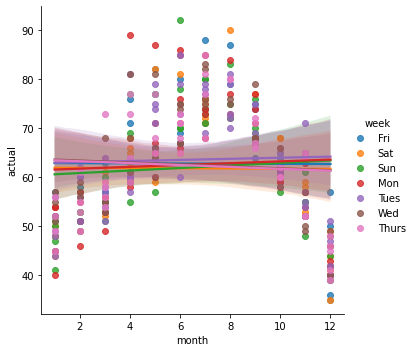

In [9]:
sns.lmplot(x="month", y="actual", hue="week", data=temp)

In [10]:
# beautiful graph 

In [11]:
import pandas_profiling
pandas_profiling.ProfileReport(temp)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [13]:
temp.describe()

year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
mean   2016.0    6.477011   15.514368   62.652299   62.701149   59.760632   
std       0.0    3.498380    8.772982   12.165398   12.120542   10.527306   
min    2016.0    1.000000    1.000000   35.000000   35.000000   45.100000   
25%    2016.0    3.000000    8.000000   54.000000   54.000000   49.975000   
50%    2016.0    6.000000   15.000000   62.500000   62.500000   58.200000   
75%    2016.0   10.000000   23.000000   71.000000   71.000000   69.025000   
max    2016.0   12.000000   31.000000  117.000000  117.000000   77.400000   

           actual  forecast_noaa  forecast_acc  forecast_under      friend  
count  348.000000     348.000000    348.000000      348.000000  348.000000  
mean    62.543103      57.238506     62.373563       59.772989   60.034483  
std     11.794146      10.605746     10.549381       10.705256   15.626179  
min     35.000000      41.000000     46.000000       44.000000   28.000000  
25%     54.000000      48.000000     53.000000       50.000000   47.750000  
50%     62.500000      56.000000     61.000000       58.000000   60.000000  
75%     71.000000      66.000000     72.000000       69.000000   71.000000  
max     92.000000      77.000000     82.000000       79.000000   95.000000

In [14]:
temp.isnull().sum()
# na 0

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

In [15]:
temp.head()

year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41

In [16]:
temp['date'] = temp['year'].astype('str') + '-' + temp['month'].astype('str') + '-' + temp['day'].astype('str')
temp['date'].tail()

# 346    2016-12-30
# 347    2016-12-31

343    2016-12-27
344    2016-12-28
345    2016-12-29
346    2016-12-30
347    2016-12-31
Name: date, dtype: object

In [17]:
temp.shape
# (348, 13)

(348, 13)

In [18]:
temp['date'] = pd.to_datetime(temp['date'])
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            348 non-null    int64         
 1   month           348 non-null    int64         
 2   day             348 non-null    int64         
 3   week            348 non-null    object        
 4   temp_2          348 non-null    int64         
 5   temp_1          348 non-null    int64         
 6   average         348 non-null    float64       
 7   actual          348 non-null    int64         
 8   forecast_noaa   348 non-null    int64         
 9   forecast_acc    348 non-null    int64         
 10  forecast_under  348 non-null    int64         
 11  friend          348 non-null    int64         
 12  date            348 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(10), object(1)
memory usage: 35.5+ KB


In [19]:
v = pd.DataFrame(pd.date_range(start = temp['date'].dt.strftime('%Y-%m-%d').min(), 
                               end=temp['date'].dt.strftime('%Y-%m-%d').max()))[0].dt.strftime('%Y-%m-%d').values
v[:5]

array(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
       '2016-01-05'], dtype=object)

In [20]:
a=set(v) - set(temp['date'].dt.strftime('%Y-%m-%d'))
print(a)
len(a)

{'2016-02-29', '2016-08-18', '2016-09-01', '2016-08-25', '2016-10-30', '2016-08-20', '2016-08-27', '2016-08-22', '2016-08-29', '2016-02-14', '2016-08-31', '2016-02-13', '2016-08-17', '2016-08-19', '2016-08-24', '2016-08-21', '2016-09-02', '2016-08-26'}


18

In [21]:
temp.corr()

year     month       day    temp_2    temp_1   average  \
year             NaN       NaN       NaN       NaN       NaN       NaN   
month            NaN  1.000000 -0.000412  0.047651  0.032664  0.120806   
day              NaN -0.000412  1.000000 -0.046194 -0.000691 -0.021136   
temp_2           NaN  0.047651 -0.046194  1.000000  0.857800  0.821560   
temp_1           NaN  0.032664 -0.000691  0.857800  1.000000  0.819328   
average          NaN  0.120806 -0.021136  0.821560  0.819328  1.000000   
actual           NaN  0.004529 -0.021675  0.805835  0.877880  0.848365   
forecast_noaa    NaN  0.131141 -0.021393  0.813134  0.810672  0.990340   
forecast_acc     NaN  0.127436 -0.030605  0.817374  0.815162  0.990705   
forecast_under   NaN  0.119786 -0.013727  0.819576  0.815943  0.994373   
friend           NaN  0.048145  0.024592  0.583758  0.541282  0.689278   

                  actual  forecast_noaa  forecast_acc  forecast_under  \
year                 NaN            NaN           NaN             NaN   
month           0.004529       0.131141      0.127436        0.119786   
day            -0.021675      -0.021393     -0.030605       -0.013727   
temp_2          0.805835       0.813134      0.817374        0.819576   
temp_1          0.877880       0.810672      0.815162        0.815943   
average         0.848365       0.990340      0.990705        0.994373   
actual          1.000000       0.838639      0.842135        0.838946   
forecast_noaa   0.838639       1.000000      0.979863        0.985670   
forecast_acc    0.842135       0.979863      1.000000        0.983910   
forecast_under  0.838946       0.985670      0.983910        1.000000   
friend          0.569145       0.669221      0.696054        0.691177   

                  friend  
year                 NaN  
month           0.048145  
day             0.024592  
temp_2          0.583758  
temp_1          0.541282  
average         0.689278  
actual          0.569145  
forecast_noaa   0.669221  
forecast_acc    0.696054  
forecast_under  0.691177  
friend          1.000000

### Answer 
데이터 상에서 수치 결측치는 존재하지 않는다. 시계열 데이터 관점으로 봤을때, 18일치의 일자 데이터가 결측치로 존재한다.     
문제 해결시 시계열 방식으로 접근 하지 않을 것이기에 
누락된 일자에 대해서 따로 결측치 처리를 해주지 않을 것이다.     
시계열 관점으로 해석을 할 경우 누락된 데이터는 평균 보간을 실시 하여 처리할 수 있다.    
    
데이터 시각화 결과 상관관계를 보이는 컬럼들이 확인되며 주기적 경향을 보이는 데이터들이 확인된다.     

year, month, day, week, 값은 불필요 컬럼으로 제외한다. week의 경우 원핫인코딩을 진행해서 추가한다.      
train셋과 test셋은 8:2비율로 나눠서 모델링을 진행한다.     
friend 컬럼의 경우 상관관계를 확인했을때 상대적으로 낮은 값을 가지기에 제외하고 학습을 진행한다.     

In [22]:
tempdum = pd.get_dummies(temp)
temp_drop = tempdum.drop(columns=['year','month','day','friend','date'])

X = temp_drop.drop(columns=['actual'])
y = temp_drop['actual']

from sklearn.model_selection import train_test_split

X_train,X_test , y_train,y_test = train_test_split(X,y,random_state=2205,test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
#((278, 13), (70, 13), (278,), (70,))

((278, 13), (70, 13), (278,), (70,))

### 1-2 Random Forest 모델 적합 및 검증  
- Random Forest 학습 및 예측 결과 해석    
- 예측 결과 검정 해석, 중요변수 도출    
- 변수 중요성 분석 및 그래프 출력     

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import time
import matplotlib.pyplot as plt

result = []
rf = RandomForestRegressor(random_state=2205)
start = time.time()
rf.fit(X_train,y_train)
end = time.time()

pred = rf.predict(X_test)
print('RandomForest r2_score : ',r2_score(y_test,pred)) # 0.7869275819927842
print('learning time ',end-start) # 0.24564099311828613

RandomForest r2_score :  0.7869275819927842
learning time  0.25670552253723145


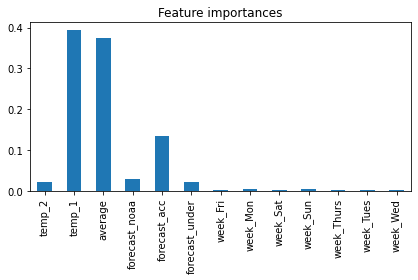

In [24]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

### 1-3 SVM(Support Vector Machine) 모델 적합 및 검증 
- svm 학습 및 예측 결과 해석    
- 예측 결과 검정 해석, 중요변수 도출    
- 변수 중요성 분석 및 그래프 출력     

In [25]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import time
svm = SVR()

In [26]:
start = time.time()
svm.fit(X_train,y_train)
end = time.time()

pred = svm.predict(X_test)
print('svm r2_score : ',r2_score(y_test,pred))
print('learning time ',end-start)
print('svm은 변수 중요도를 따로 추출할 수 없다. r2_score의 경우 RandomForest에 비해 낮다')

result.append([end-start,r2_score(y_test,pred)])

svm r2_score :  0.7372445880296743
learning time  0.008877277374267578
svm은 변수 중요도를 따로 추출할 수 없다. r2_score의 경우 RandomForest에 비해 낮다


### 1-4 모델 비교 및 향후 개선 방향 도출
- Random Forest, SVM 모델의 결과 비교 후 최종 모델 선택    
- 두 모델의 장단점 분석, 추후 운영 관점에서 어떤 모델을 선택할 것인가?    
- 모델링 관련 추후 개선 방향 제시     

#### 파라미터 튜닝을 제외한 기본모델의 경우 모델학습시간은 랜덤포레스트가 svm에 비해 더 오래 걸린다.      
#### test셋에 대한 모델 r2score는 랜덤포레스트가 더 높다.    
#### 모델 학습시간을 중점둔다면 svm이 더 유리하다. 하지만 랜덤포레스트의 경우 변수중요도를 확인 할 수 있고, 
#### 정확도가 더 높기 때문에 최종적으로는 랜덤포레스트를 선택한다. 

# 2번 
5분간격의 가구별 전력 사용량의 데이터    
데이터 출처 : 자체생성    
데이터 경로 : /kaggle/input/adp-kr-p2/problem2.csv    

### 2-1 데이터 전처리
각 가구의 15분간격의 전력량의 합을 구하고 해당데이터를 바탕으로 총 5개의 군집으로 군집화를 진행한 후 아래의 그림과 같은 형태로 출력하라.    
군집화를 위한 데이터 구성의 이유를 설명하라    
(군집 방식에 따라 Cluster컬럼의 값은 달라질수 있음)
![image](https://github.com/Datamanim/datarepo/blob/main/adp/p2/problem2.png?raw=true)

In [27]:
import matplotlib.pyplot as plt
ttt= pd.read_csv('../input/adp-kr-p2/problem2.csv')
tt = ttt.sort_values(['houseCode','date']).reset_index(drop=True)

tt['date'] = pd.to_datetime(tt['date'])

tg = tt.groupby(['houseCode']).resample('15min', on='date')['power consumption'].sum().reset_index()

tg = tg.rename(columns= {'power consumption':'power consumption sum'})

tgg = tg.copy()

tgg['c'] =tgg['houseCode'].str[-2:].astype('int')
tgg['d'] =tgg['date'].dt.hour
tgg['e'] =tgg['date'].dt.day

from sklearn.cluster import KMeans 

# k-means clustering 실행
kmeans = KMeans(n_clusters=5)
kmeans.fit(tgg.iloc[:,2:].values)

tg['Cluster'] =kmeans.labels_

tg

houseCode                date  power consumption sum  Cluster
0       house_00 2050-01-01 00:00:00             136.249952        3
1       house_00 2050-01-01 00:15:00              98.283387        3
2       house_00 2050-01-01 00:30:00              53.967679        3
3       house_00 2050-01-01 00:45:00             204.821270        1
4       house_00 2050-01-01 01:00:00             150.760786        1
...          ...                 ...                    ...      ...
133915  house_44 2050-01-31 22:45:00             334.675717        0
133916  house_44 2050-01-31 23:00:00             463.419892        4
133917  house_44 2050-01-31 23:15:00             369.930740        0
133918  house_44 2050-01-31 23:30:00             237.713030        2
133919  house_44 2050-01-31 23:45:00             184.888439        1

[133920 rows x 4 columns]

### 2-2 히트맵
2-1의 데이터를 바탕으로 각 군집의 요일, 15분간격별 전력사용량의 합을 구한 후 아래와 같이 시각화 하여라    
(수치는 동일하지 않을 수 있음 2-1의 데이터가 정확하게 아래와 같은 이미지로 변환 됐는지 주로 확인)     
![image](https://github.com/Datamanim/datarepo/blob/main/adp/p2/problem2_Example.png?raw=true)

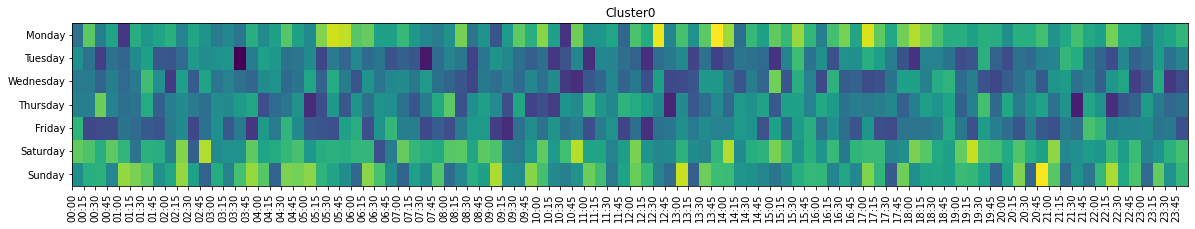

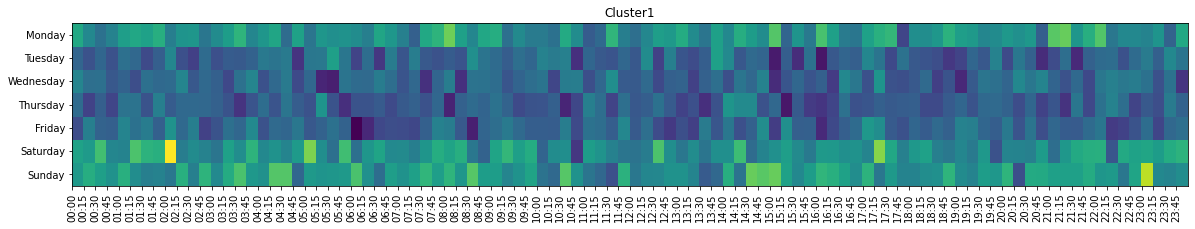

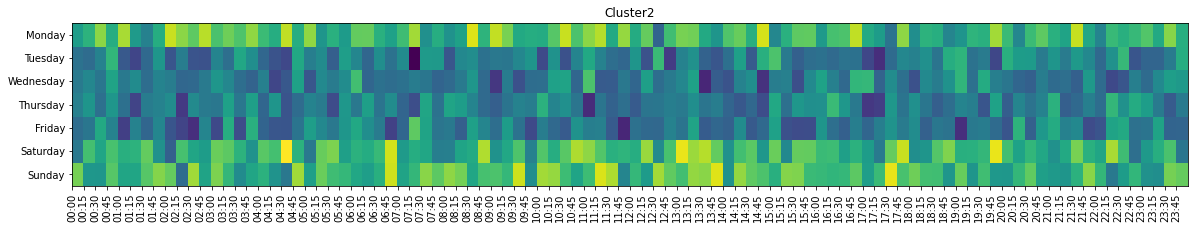

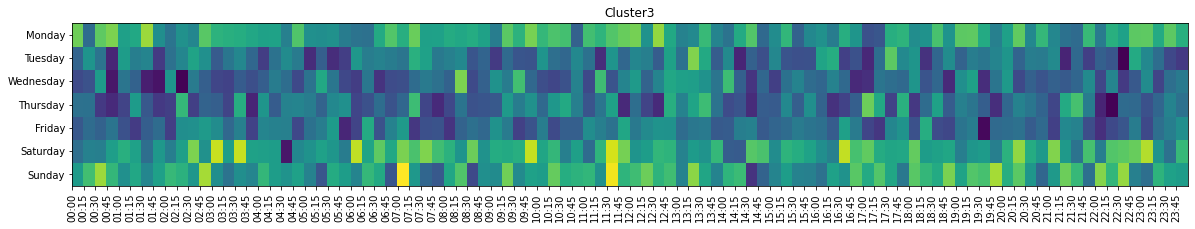

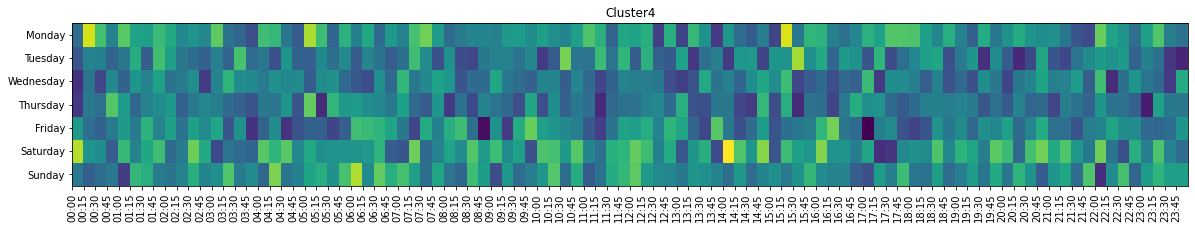

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

tg['day'] = tg.date.dt.day_name()

tg['min'] = tg.date.dt.strftime('%H:%M')

pv = tg.groupby(['Cluster','day','min'],as_index=False).sum()
for v in range(5):
    plt.figure(figsize=(20,3))
    target = pv.loc[pv.Cluster==v]
    pvt = target.pivot(index='day',columns='min',values='power consumption sum').reindex(['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday'])
    plt.pcolor(pvt)
    plt.title('Cluster'+str(v))
    plt.xticks(range(len(pvt.columns)),pvt.columns,rotation=90)
    plt.yticks(np.arange(len(pvt.index))+0.5,pvt.index)


# 3번 태양광 데이터
예측 변수 :SOLAR PV


데이터 경로 : /kaggle/input/adp-kr-p2/problem3.csv    
데이터 출처 : https://www.kaggle.com/cheedcheed/california-renewable-production-20102018

### 3-1
**데이터셋 분할 및 결과 검증**    
- 데이터셋 7:3 분할    
- 데이터 전처리 및 예측 모델 생성    
- 모델 성능 검증 : RMSE, R제곱, 정확도(아래 방식으로 연산)로 구하여라    
- 정확도의 경우 실제값>예측값인 경우 (1-예측값/실제값), 실제값<예측값인 경우 (1- 실제값/예측값)으로 하고 이것들을 평균낸 후 1에서 뺀값으로 한다.   
  분수식의 분모가 0인 경우의 정확도는 0.5로 취급한다.

- 최종 결과 제출 : 소수점 3째자리 반올림     

In [29]:
df= pd.read_csv('/kaggle/input/adp-kr-p2/problem3.csv')

df = df.drop(columns =['SOLAR'])
df.head()

TIMESTAMP  BIOGAS  BIOMASS  GEOTHERMAL  Hour  SMALL HYDRO  \
0  2012-11-26 00:00:00   208.0    354.0       926.0   1.0        208.0   
1  2012-11-26 01:00:00   207.0    354.0       927.0   2.0        207.0   
2  2012-11-26 02:00:00   208.0    353.0       927.0   3.0        208.0   
3  2012-11-26 03:00:00   208.0    350.0       927.0   4.0        209.0   
4  2012-11-26 04:00:00   209.0    352.0       927.0   5.0        209.0   

   SOLAR PV  SOLAR THERMAL  WIND TOTAL  
0       0.0            0.0        57.0  
1       0.0            0.0        76.0  
2       0.0            0.0       100.0  
3       0.0            0.0       111.0  
4       0.0            0.0       131.0

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


def suntimeChecker(x):
    if pd.to_datetime(x).hour in list(range(6,18)):
        return 1
    else:
        return 0

df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df['suntime'] = df['TIMESTAMP'].apply(suntimeChecker)

X = df.drop(columns=['TIMESTAMP','Hour','SOLAR PV'])
y= df['SOLAR PV']

X_train,X_test ,y_train,y_test = train_test_split(X,y,random_state =2 , test_size =0.3)

rf =RandomForestRegressor()
rf.fit(X_train,y_train)

pred = rf.predict(X_test)

def getEachAccuracy(y_true,y_pred):
    if y_true ==0:
        return 0.5
    if y_pred ==0:
        return 0.5
    
    if y_true > y_pred:
        return 1-(y_pred/y_true)
    else:
        return 1-(y_true/y_pred)
    
acc = []
for i,v in enumerate(y_test):
    acc.append(getEachAccuracy(v,pred[i]))

In [31]:
# 데이터 전처리의 경우 날짜 컬럼을 제외하고, nan값만 있는 컬럼을 제외했다. 
# 해가 존재하는시각을 (06~17시)로 설정해서 파생변수를 만들어줬다
# 정확도의 경우 아래와 같다

print('RMSE',round(mean_squared_error(y_test, pred)**0.5,3))
print('r2',round(r2_score(y_test, pred),3))
print('acc',1- round(sum(acc)/len(acc),3))

RMSE 705.63
r2 0.913
acc 0.624
